# Min Han SOE

# Data Modeling

The aim of the lab is to put into practice the algorithms and concepts seen in the Data Modeling course. This notebook is provided as a standalone ressource to be run on Google Colab. <br>
You should be able to run it out of the box on a default Colab instance.

<hr>

## Assignment

In this notebook, you will find some helper functions along which <i>you</i> will have to write code to complete the assignment. You can write your analysis along the code in comments OR create a text cell (like this one) into which you may write your answers. The cells support HTML and Markdown language tags. <br>
Your code is expected to work, the <i>value</i> you provide and on which you are evaluated lies in the analysis: don't skip it.

The lab is split into two sections: Clustering and Regression. <br>
The first section corresponds to the first lesson and lab, the rest at a later date.

# Problem:
We are using the same dataset as the first lab, the nutrition information of the MacDonald's menu. From your previous conclusions, you have insights which will help validate these new techniques.   

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Loading the dataset
mc_data = pd.read_csv("menu.csv")
print(mc_data.columns)
mc_data.head()


Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
mc_data.loc[mc_data['Calories'].idxmax()] #outlier item

Category                                       Chicken & Fish
Item                             Chicken McNuggets (40 piece)
Serving Size                                  22.8 oz (646 g)
Calories                                                 1880
Calories from Fat                                        1060
Total Fat                                               118.0
Total Fat (% Daily Value)                                 182
Saturated Fat                                            20.0
Saturated Fat (% Daily Value)                             101
Trans Fat                                                 1.0
Cholesterol                                               265
Cholesterol (% Daily Value)                                89
Sodium                                                   3600
Sodium (% Daily Value)                                    150
Carbohydrates                                             118
Carbohydrates (% Daily Value)                              39
Dietary 

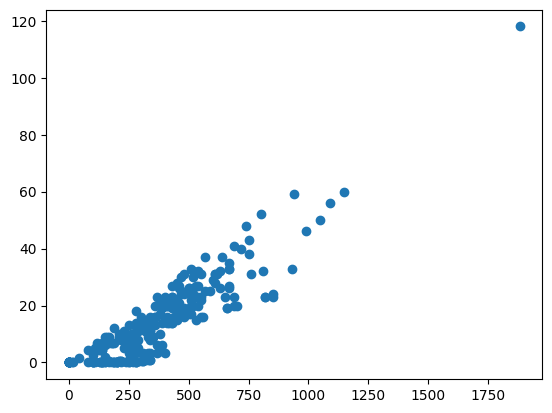

In [4]:
# Visualize your individuals
plt.scatter(mc_data[["Calories"]],mc_data[["Total Fat"]])
plt.show()

# Exercise 1: Modeling

We want to model the relationship between different variables from our McDonald's dataset. We're interested in, first, finding a dependent variables to predict using a set of independent variables.





In [5]:
# Cleaning the data
interesting_cols = ['Calories', 'Calories from Fat',
       'Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol',
       'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein'
       ]
mc_data = mc_data[interesting_cols]

**Q1** : Display the correlation matrix between our quantitative variables. What can you tell about the relationships?

<AxesSubplot: >

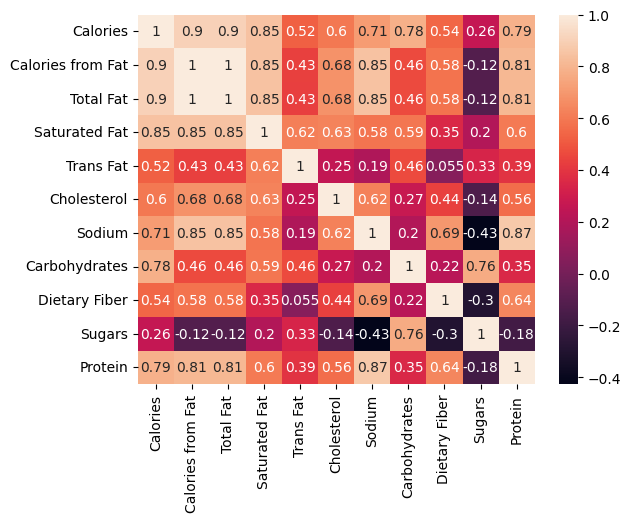

In [6]:
import seaborn as sns 

sns.heatmap(mc_data.corr(), annot=True)

By using a heatmap of the correlation matrix, we can clearly identify the variables that are highly correlated to one another. The variables that stand out from the rest are Calories from Fat and Total Fat on the basis of having the same correlation value. Meaning thus these two variables have same linear relationship. While others variables have close to zero correlation value, Sugars variable is the only one on the dataframe that has a negative correlation with the others variables. Calories is the one the with the highest correlation values across all variables which make sense accoriding to the nature of the dataset being a nutrition information about Mc'Donalds food items.

**Q2** : Specifically, which variables are most strongly related to "Calories"?

Variables that are most strongly related to "Calories" are Calories from Fat, Total Fat both with values of 0.9. Followed by Saturated Fat (0.85), Carbohydrate(0.78) and Protein(0.79) respectively.

**Q3** : Based on the last plot before this series of questions, (Total Fat and Calories) : How many outliers are there? Why would we want to remove it?

Based on the last plot before, we can see there's one outlier. We would want to remove it because it can have big impact on our statistical analysis and also it can skew our model and hypothesis with it's high value point. By taking a look at the actual item it is a 40 pieces of Chicken McNuggets which we also have smaller portion of it in our dataset already therefore by removing it we will not lose any information on the dataset. Since we are modeling relations between variables it makes perfect sense to remove this.


**Q4** : Remove the outlier from your data.

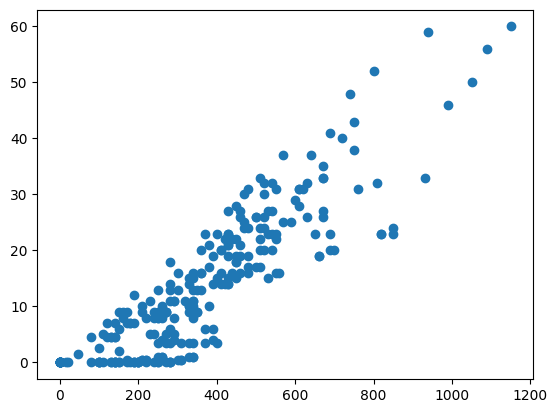

In [7]:
# Q4 : Removing outlier(s)
outlier_index = mc_data[mc_data["Calories"] == max(mc_data["Calories"])].index
mc_data_reduced = mc_data.drop(axis=1, index=outlier_index)

# Visualize your individuals
plt.scatter(mc_data_reduced[["Calories"]],mc_data_reduced[["Total Fat"]])
plt.show()

<hr>

For this section, we will only be studying the 'Calories' and 'Total Fat' columns.

**Q5** : Split the data into a training (80%) and validation (20%) set. Sort your resulting datasets by the values from "Total Fat".

In [8]:
from sklearn.model_selection import train_test_split

mc_train, mc_test = train_test_split(mc_data_reduced, test_size=0.2, random_state=42)

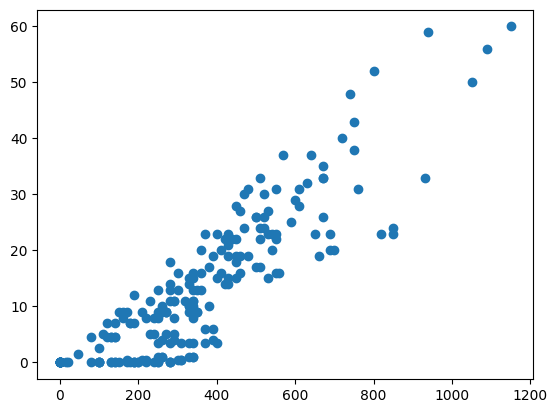

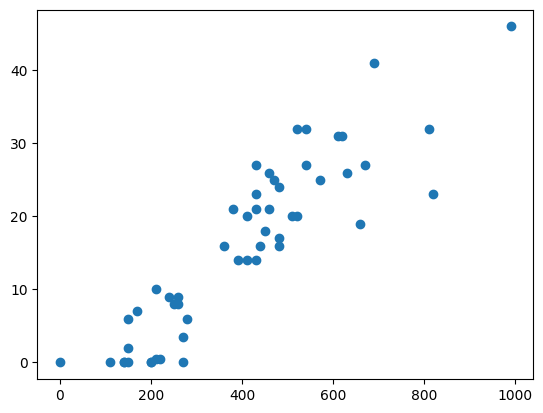

In [9]:
mc_train.sort_values(by =["Total Fat"], inplace = True)
mc_test.sort_values(by =["Total Fat"], inplace = True)

# Visualize your individuals
plt.scatter(mc_train[["Calories"]],mc_train[["Total Fat"]])
plt.show()

# Visualize your individuals
plt.scatter(mc_test[["Calories"]],mc_test[["Total Fat"]])
plt.show()

**Q6** : Build a Regression Tree using sklearn.tree.DecisionTreeRegressor, using 'Calories' as the dependent variable, 'Total Fat' as input.
- Build the tree with a max_depth=2
- Fit the tree on mc_train_input to predict the value mc_train_target
- Predict the values of mc_test_input
- Visualize the values outputed from the prediction (code provided)



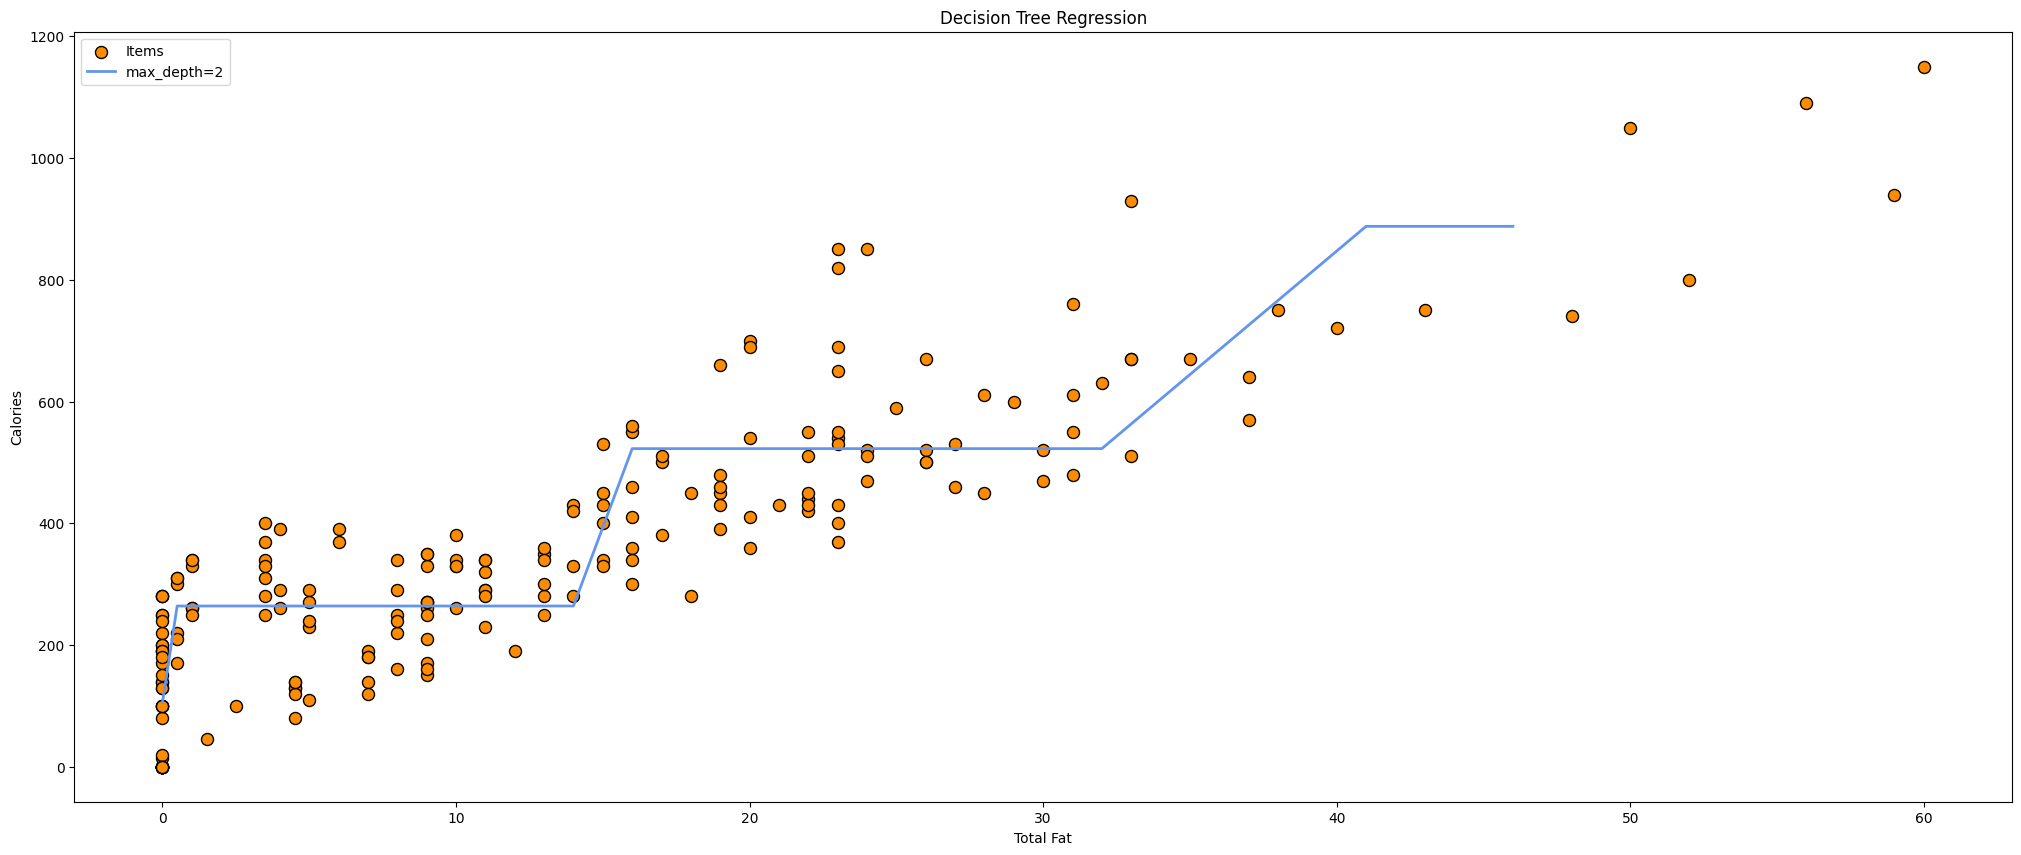

In [10]:
from sklearn.tree import DecisionTreeRegressor

mc_train_input, mc_train_target = mc_train[["Total Fat"]], mc_train[["Calories"]]
mc_test_input, mc_test_target = mc_test[["Total Fat"]], mc_test[["Calories"]]


tree_1 = DecisionTreeRegressor(max_depth=2)
tree_1.fit(mc_train_input, mc_train_target)

y_pred = tree_1.predict(mc_test_input)

# Plot the results
fig = plt.figure(figsize=(25, 10))
plt.scatter(mc_train_input, mc_train_target, s=75, edgecolor="black", c="darkorange", label="Items")
plt.plot(mc_test_input, y_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("Total Fat")
plt.ylabel("Calories")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


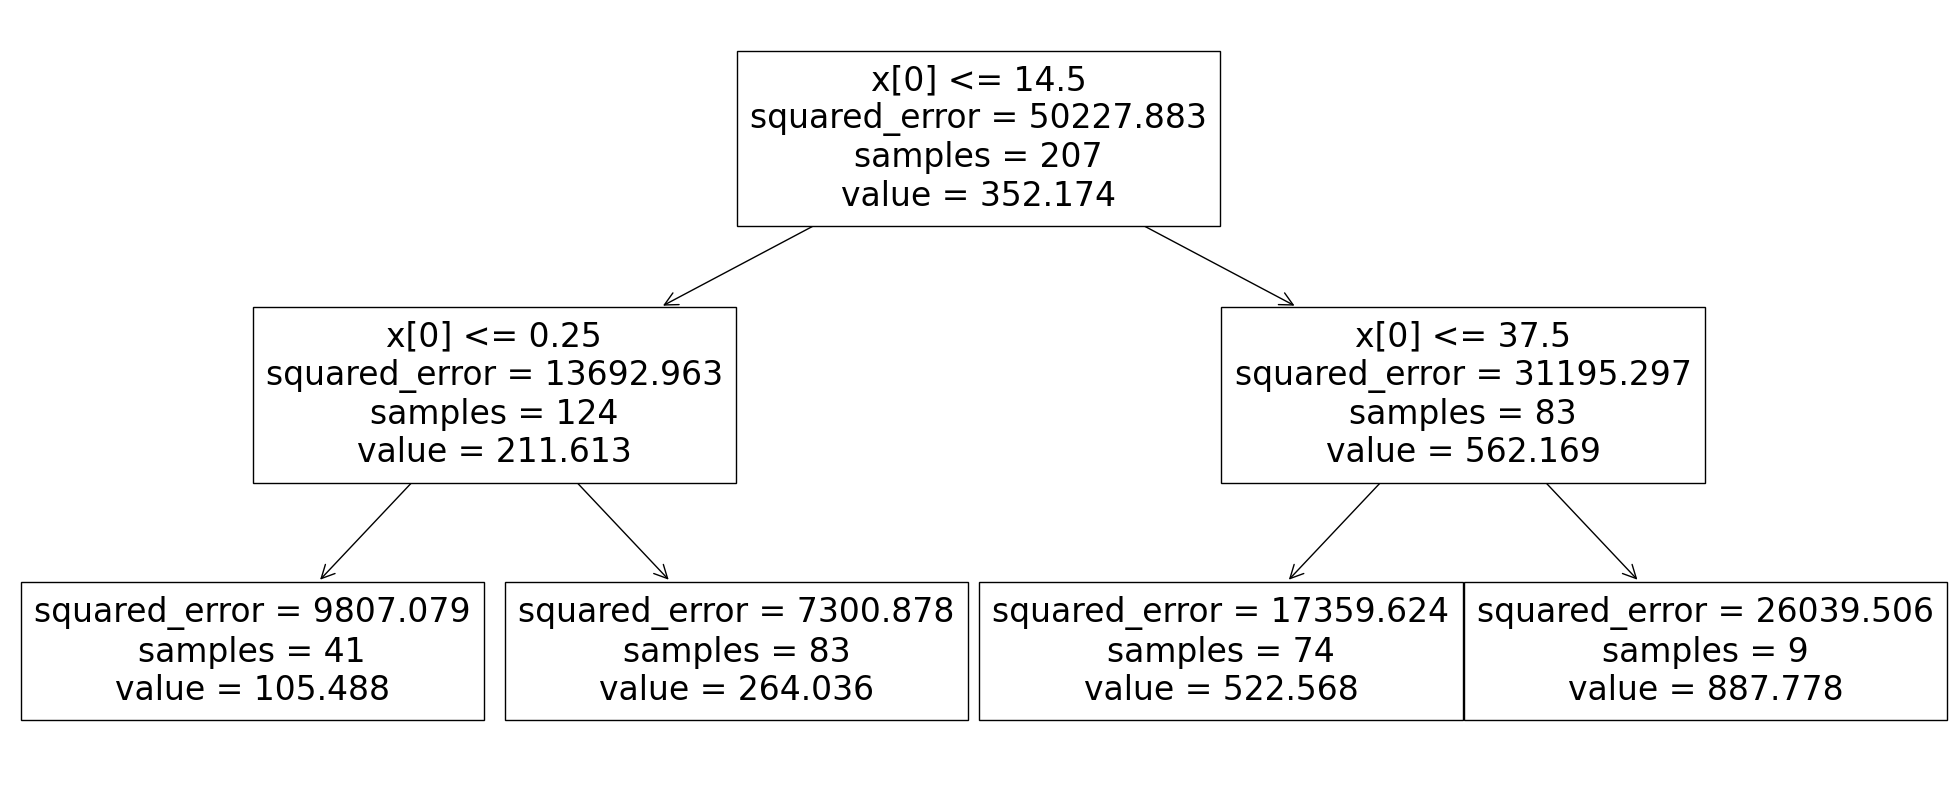

In [11]:
from sklearn import tree

fig = plt.figure(figsize=(25, 10))
tree.plot_tree(tree_1)
plt.show()

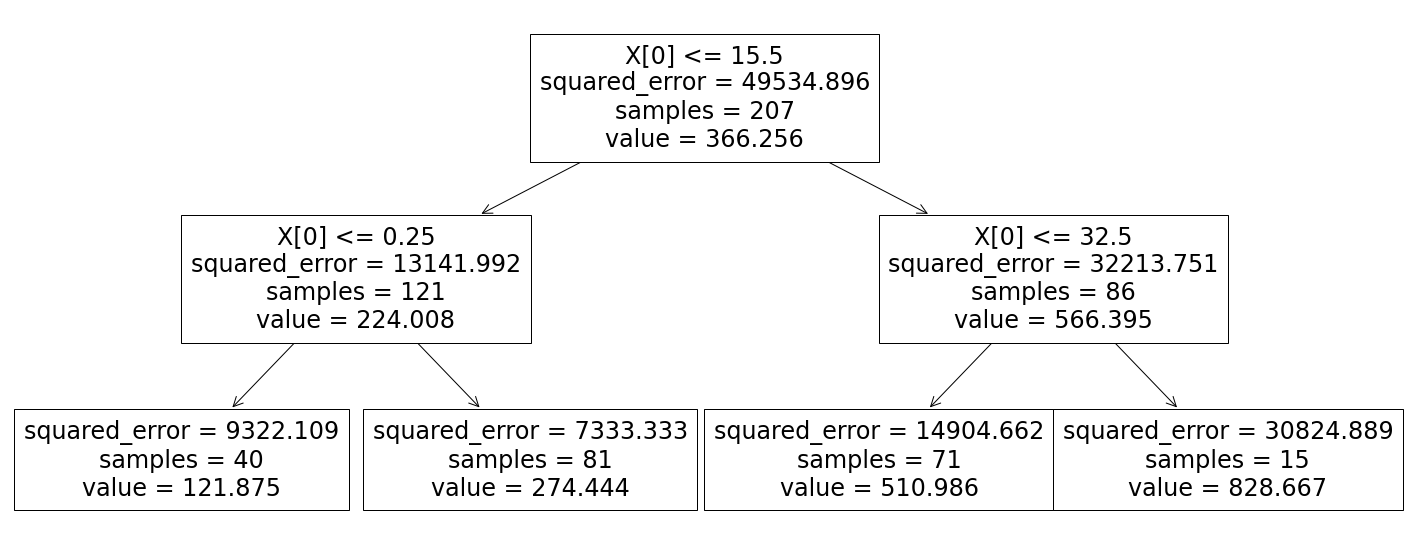

**Q7** : How many different values can you observe from max_depth=2?

We can observe 4 different values from max_depth=2.

**Q8** : Compute the accurac of your model on the training set.
- Predict the value of each point in mc_train_input
- Using sklearn.metrics.mean_squared_error, compute the accuracy of the resulting y_pred and mc_train_target.

In [12]:
from sklearn.metrics import mean_squared_error

y_pred_train = tree_1.predict(mc_train_input)

MSE_train = mean_squared_error(mc_train_target, y_pred_train)

In [13]:
MSE_train

12207.878517808798


**Q9** : Repeat this process to get the MSE for the test set.

In [14]:
y_pred_test = tree_1.predict(mc_test_input)

MSE_test = mean_squared_error(mc_test_target, y_pred_test)

In [15]:
MSE_test

11059.803712144561


**Q10** : Plot the two MSEs (train and test) for trees with max_depth ranging between 2 and 10. Which depth would you choose?

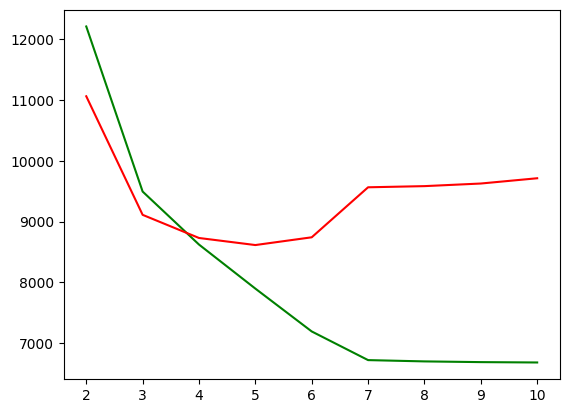

In [16]:
MSE_train_list = []
MSE_test_list = []
index = []
for i in range(2, 11):
    tree_i = DecisionTreeRegressor(max_depth=i, random_state=42)
    tree_i.fit(mc_train_input, mc_train_target)
    #FOR TRAIN
    y_pred_train = tree_i.predict(mc_train_input)
    MSE_train_list.append(mean_squared_error(mc_train_target, y_pred_train)) 
    #FOR TEST
    y_pred_test = tree_i.predict(mc_test_input)
    MSE_test_list.append(mean_squared_error(mc_test_target, y_pred_test))
    index.append(i)
    
#PLOTTING
plt.plot(index, MSE_train_list, color='green')
plt.plot(index, MSE_test_list, color='red')
plt.show()    

By plotting the two MSEs (train and test) for trees with max_depth ranging between 2 and 10, I would choose max_depth of 5 as it has the lowest mean squared error for the test set.


**Q11** : Based on the plot and the MSEs, do you think your tree has overfit the data with max_depth=10?

Yes, based on the plot and the MSEs, the decision tree has overfit the data with max_depth of 10 where the test set have really low MSE whereas the train set have high MSE. Which means that the model is generalizing the training set and got great results but with unseen test data it performs poorly.

**Bonus** : Play around with the tree configuration and its documentation: Can you find a better performing model? What criteria and parameters did you use?

In [17]:
from sklearn.model_selection import GridSearchCV


In [18]:
new_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

In [19]:
param_grid = {"splitter":["best","random"],
           "min_samples_leaf":[1,2,3,4,5,6],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30]}  
   
grid = GridSearchCV(new_tree, param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(mc_train_input, mc_train_target) 

grid_predictions = grid.predict(mc_test_input) 
   



Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-2.995 total time=   0.0s
[CV 2/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2.099 total time=   0.0s
[CV 5/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-4.213 total time=   0.0s
[CV 1/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-3.447 total time=   0.0s
[CV 5/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-1.277 total time=   0.0s
[CV 2/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-2.099 total time=   0.0s
[CV 2/5] END max_feature

[CV 1/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-9.483 total time=   0.0s
[CV 5/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.592 total time=   0.0s
[CV 1/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-9.483 total time=   0.0s
[CV 2/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-2.099 total time=   0.0s
[CV 3/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.907 total time=   0.0s
[CV 4/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-1.682 total time=   0.0s
[CV 5/5] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_

[CV 1/5] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-9.483 total time=   0.0s
[CV 2/5] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-2.099 total time=   0.0s
[CV 3/5] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.907 total time=   0.0s
[CV 4/5] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-1.6ples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-9.483 total time=   0.0s
[CV 2/5] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-2.099 total time=   0.0s
[CV 3/5] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.907 total time=   0.0s
[CV 4/5] EN

In [20]:
 
# print best parameter after tuning 
print(grid.best_params_) 

{'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [21]:
print(mean_squared_error(mc_test_target, grid_predictions)) 


10494.642363392057


We now want to study the relationship between multiple variables and Calories. They should add more information to get more accurate values.

**Q12** : Create a new tree to predict the number of Calories from our McItems, using the variables 'Total Fat', 'Carbohydrates', 'Sugars' and 'Protein'.

In [22]:
X = pd.DataFrame(mc_data_reduced, columns=[ 'Total Fat', 'Carbohydrates', 'Sugars', 'Protein'])
y = mc_data_reduced['Calories']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
new_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [25]:
y_pred1 = new_tree.predict(X_test)

In [26]:
MeanSE = mean_squared_error(y_test, y_pred1)

In [27]:
MeanSE

4012.753996329805

**Q13** : Find the best performing parameters using the same process as Q10. What is their test MSE?

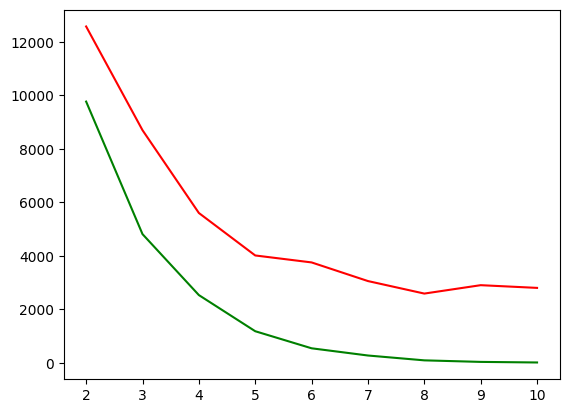

In [28]:
MSE_train_list1 = []
MSE_test_list1 = []
index = []

for i in range(2, 11):
    tree_e = DecisionTreeRegressor(max_depth=i, random_state=42)
    tree_e.fit(X_train, y_train)
    #for train
    y_pred_train1 = tree_e.predict(X_train)
    MSE_train_list1.append(mean_squared_error(y_train, y_pred_train1))
    #for test
    y_pred_test1 = tree_e.predict(X_test)
    MSE_test_list1.append(mean_squared_error(y_test, y_pred_test1))
    index.append(i)
    
plt.plot(index, MSE_test_list1, color='red')
plt.plot(index, MSE_train_list1, color='green')
plt.show()    

In [47]:
for depth, mse_train in enumerate(MSE_train_list1, start=2):
    print(f"MSE for max depth {depth} on the training set: {mse_train}")

MSE for max depth 2 on the training set: 9769.549587641417
MSE for max depth 3 on the training set: 4810.8744833768205
MSE for max depth 4 on the training set: 2530.3222856245125
MSE for max depth 5 on the training set: 1178.0832469131703
MSE for max depth 6 on the training set: 539.5592008635487
MSE for max depth 7 on the training set: 269.76960774062223
MSE for max depth 8 on the training set: 88.54382332643202
MSE for max depth 9 on the training set: 30.732689210950078
MSE for max depth 10 on the training set: 9.017713365539452


In [48]:
for depth, mse_test in enumerate(MSE_test_list1, start=2):
    print(f"MSE for max depth {depth} on the training set: {mse_test}")

MSE for max depth 2 on the training set: 12579.618486143998
MSE for max depth 3 on the training set: 8699.308425893038
MSE for max depth 4 on the training set: 5601.704240704199
MSE for max depth 5 on the training set: 4012.753996329805
MSE for max depth 6 on the training set: 3752.2401285844335
MSE for max depth 7 on the training set: 3054.9566108945173
MSE for max depth 8 on the training set: 2586.7857578929006
MSE for max depth 9 on the training set: 2900.913995726495
MSE for max depth 10 on the training set: 2799.519230769231


The best performing max depth is 8.

**Q14** : Using the tree representation from earlier, which variables were used in the first 3 nodes to define the thresholds?

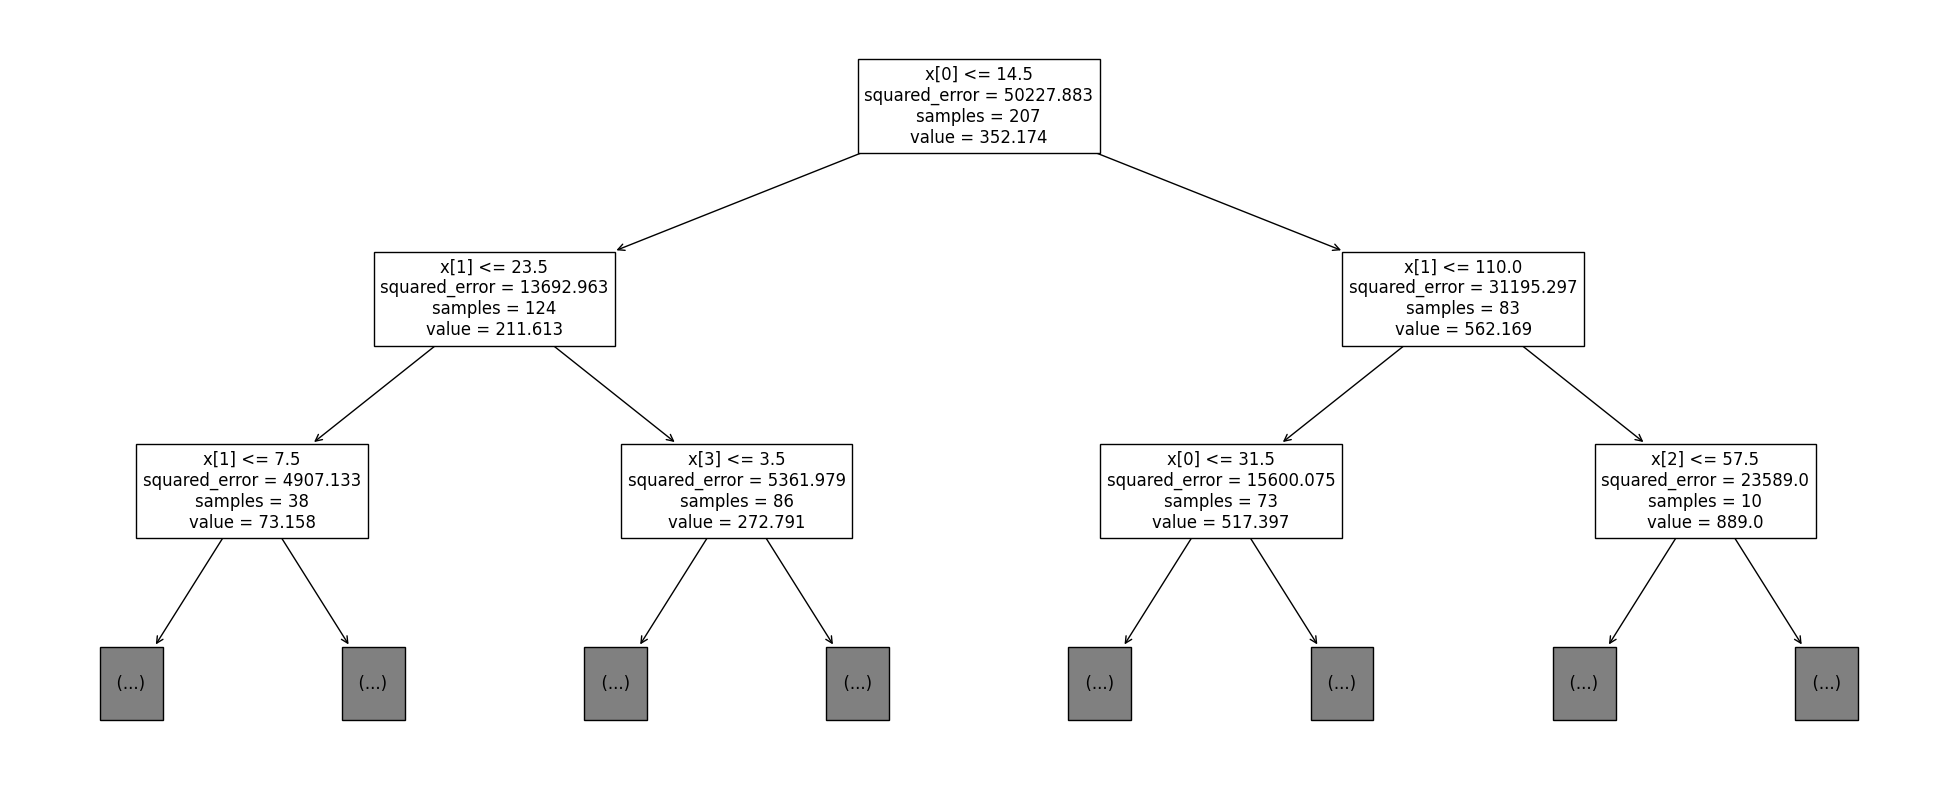

In [51]:
fig = plt.figure(figsize=(25, 10))
tree.plot_tree(new_tree, max_depth=2)
plt.show()

By looking at the tree diagram we have Total_Fat and Carbohydrates variables used in the first 3 nodes to define the thresholds.


**Q15** : Comment the output of feature_importances_ of your tree: are they close to the correlation matrix from Q1?

In [30]:
new_tree.feature_importances_

array([0.67532911, 0.28675132, 0.01820326, 0.01971631])

In [31]:
X.head()

,Total Fat,Carbohydrates,Sugars,Protein
0,13.0,31,3,17
1,8.0,30,3,18
2,23.0,29,2,14
3,28.0,30,2,21
4,23.0,30,2,21


<AxesSubplot: >

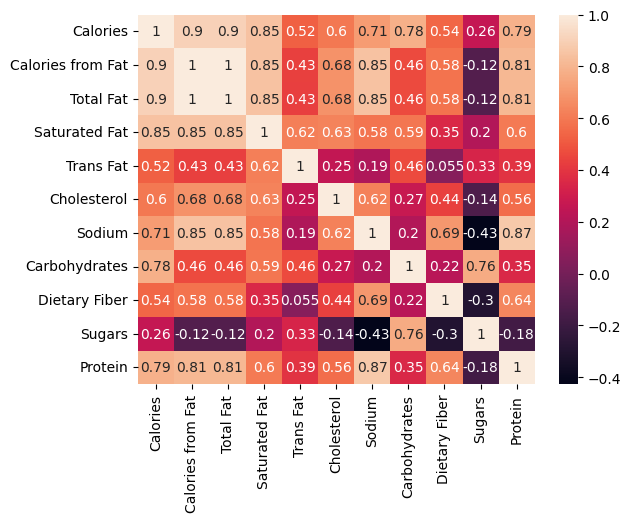

In [49]:
import seaborn as sns 

sns.heatmap(mc_data.corr(), annot=True)

After looking at the four values of the array we can conclude that the most important features for the tree model is Total Fat with a value of 0.675 followed by Carbohydrates with a value of 0.286. Even though in the correlation plot we have Protein as highly correlated as Carbohydrates but in terms of the decision tree it chooses Total Fat to split the nodes which is closely related to Protein




